# Intro to reimbursements: overview with visualization

This notebook provides an overview of the `2017-03-15-reimbursements.xz` dataset, which contains broad data regarding CEAP usage in all terms since 2009. 

It aims to provide an example of basic analyses and visualization by exploring topics such as:

- Evolution of average monthly spending along the years
- Average monthly spending per congressperson along the years
- Seasonality in reimbursements
- Reimbursements by type of spending
- Which party has the most spending congressmen?
- Which state has the most spending congressmen?
- Who were the top spenders of all time in absolute terms?
- Who were the most hired suppliers by amount paid?
- Which are the most expensive individual reimbursements?

Questions are not explicitly answered (e.g. written answers). Charts and tables are provided for free interpretation.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

# Charts styling
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 8
matplotlib.rcParams.update({'font.size': 14})
#rcParams['font.family'] = 'Georgia'

# Type setting for specific columns
#DTYPE = dict(cnpj=np.str, cnpj_cpf=np.str, ano=np.int16, term=np.str)

# Experimenting with 'category' type to reduce df size
DTYPE =dict(cnpj_cpf=np.str,\
            year=np.int16,\
            month=np.int16,\
            installment='category',\
            term_id='category',\
            term='category',\
            document_type='category',\
            subquota_group_id='category',\
            subquota_group_description='category',\
            #subquota_description='category',\
            subquota_number='category',\
            state='category',\
            party='category')

In [2]:
reimbursements = pd.read_csv('../data/2017-03-15-reimbursements.xz', \
                             dtype=DTYPE, low_memory=False, parse_dates=['issue_date'])

In [3]:
# Creates a DataFrame copy with fewer columns
r = reimbursements[['year', 'month', 'total_net_value', 'party', 'state', 'term', 'issue_date',\
        'congressperson_name', 'subquota_description','supplier', 'cnpj_cpf']]
r.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
0,2009,4,130.00,PP,PR,2015.0,2009-04-06 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,MELHOR POSTO DE COMBUSTÍVEIS LTDA,02989654001197
1,2009,4,135.00,PP,PR,2015.0,2009-04-07 00:00:00.0,DILCEU SPERAFICO,"Locomotion, meal and lodging",MELONGENA PARTICIPAÇÕES LTDA,09259358000450
2,2009,3,1000.00,PP,PR,2015.0,2009-03-12 00:00:00.0,DILCEU SPERAFICO,Maintenance of office supporting parliamentary...,ARY ANTONIO MOSCHETTA,01537369920
3,2009,4,170.00,PP,PR,2015.0,2009-04-14 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,CONVER COMBUSTÍVEIS AUTOMÓVEIS LTDA,00038505000579
4,2009,4,100.11,PP,PR,2015.0,2009-04-09 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,GRANDO E GROFF LTDA,00161576000211


## Filters depending on the scope of analysis
Here, filters by state, party, years, etc. can be applied.

In [4]:
# Filters only most recent years (from 2015)
r = r[(r.year == 2015) | (r.year == 2016) | (r.year == 2017)]

r.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
1152940,2015,1,3000.00,PP,PR,2015.0,2015-01-12 00:00:00.0,DILCEU SPERAFICO,Publicity of parliamentary activity,Gráfica União,12341389000118
1152941,2015,2,140.00,PP,PR,2015.0,2015-02-01 00:00:00.0,DILCEU SPERAFICO,Congressperson meal,CHURRASCARIA POTÊNCIA DO SUL LTDA,02454285000166
1152942,2015,1,160.67,PP,PR,2015.0,2015-01-21 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,ITAPETRO COMBUSTÍVEIS,00214280000130
1152943,2015,1,2600.00,PP,PR,2015.0,2015-01-31 00:00:00.0,DILCEU SPERAFICO,Maintenance of office supporting parliamentary...,Locadora Gralha Azul Ltda,11071967000180
1152944,2015,1,78.70,PP,PR,2015.0,2015-01-02 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,Auto Posto Tolecema Ltda,00564491000101


## Questions & answers

### Evolution of average monthly spending along the years
Are congressmen spending more today in relation to past years?

#### How many congressmen in each year?

In [5]:
years = r.year.unique()

# Computes unique names in each year and saves into a pd.Series
d = dict()
for y in years:
    d[y] = len(r[r.year == y].congressperson_name.unique())

s = pd.Series(d)
s

2015    769
2016    573
2017    520
dtype: int64

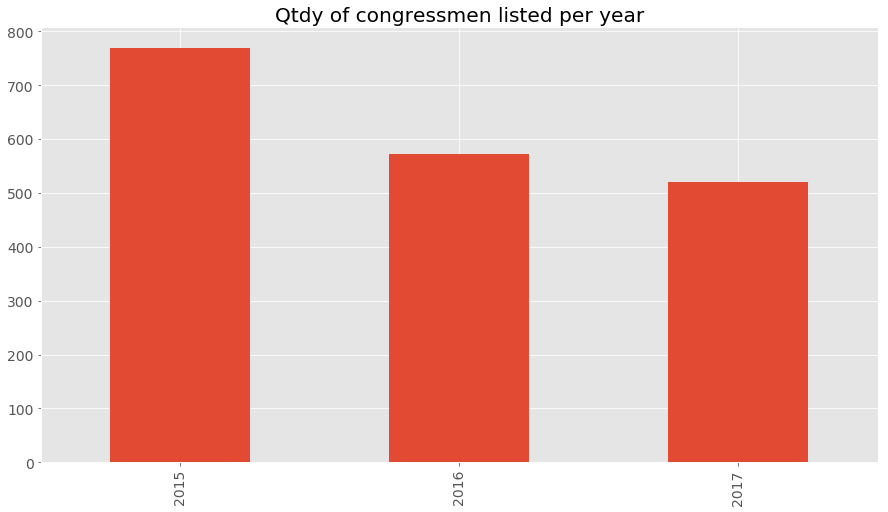

In [6]:
s.plot(kind='bar')
plt.title('Qtdy of congressmen listed per year')

#### How much did they spend, in average, per month in each year?

In [7]:
# Groups by name summing up spendings
a = r.groupby(['year']).sum().drop('month', 1)
a['congressmen_qty'] = s
a['monthly_value_per_congressmen'] = a['total_net_value'] / a['congressmen_qty'] / 12
a = a.drop(2017, 0)  # Neglets 2017

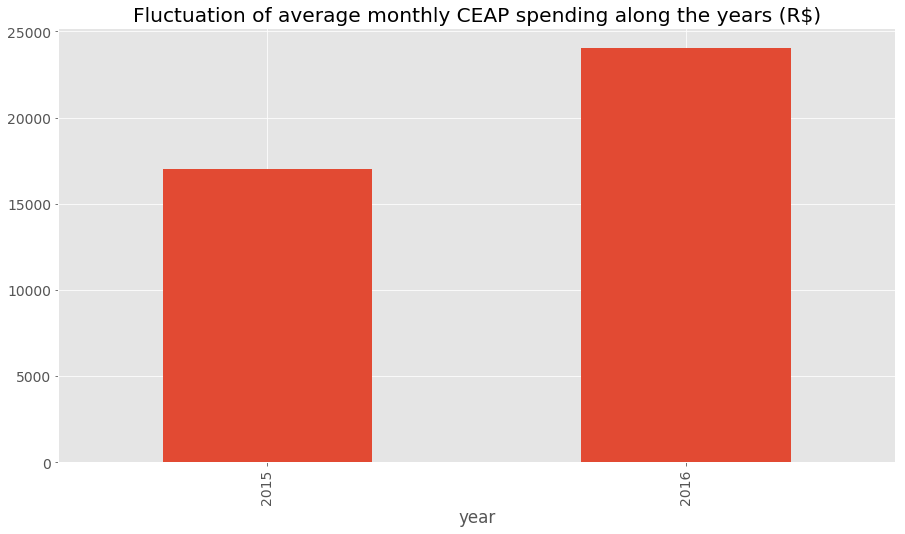

In [8]:
a.monthly_value_per_congressmen.plot(kind='bar')
plt.title('Fluctuation of average monthly CEAP spending along the years (R$)')

### Average monthly spending per congressperson along the years
This table shows the data above detailed per congressperson.

In [9]:
# Groups by name summing up spendings
a = r.groupby(['congressperson_name', 'year'])\
    .sum()\
    .drop('month', 1)

# Computes average spending per month and unstacks
a['monthly_total_net_value'] = a['total_net_value'] / 12
a = a.drop('total_net_value', 1).unstack()

# Creates subtotal column to the right
a['mean'] = a.mean(axis=1)

a.head()

monthly_total_net_value                             \
year                                   2015          2016         2017   
congressperson_name                                                      
ABEL MESQUITA JR.              32626.218333  37927.937500  1685.588333   
ABELARDO CAMARINHA              2693.010833           NaN          NaN   
ABELARDO LUPION                 2497.000000           NaN          NaN   
ACELINO POPÓ                    2604.166667           NaN          NaN   
ADAIL CARNEIRO                 25684.210000  26561.794167  2984.378333   

                             mean  
year                               
congressperson_name                
ABEL MESQUITA JR.    24079.914722  
ABELARDO CAMARINHA    2693.010833  
ABELARDO LUPION       2497.000000  
ACELINO POPÓ          2604.166667  
ADAIL CARNEIRO       18410.127500

### Seasonality in reimbursements
Out of curiosity,in which period of the year more reimbursements were issued?

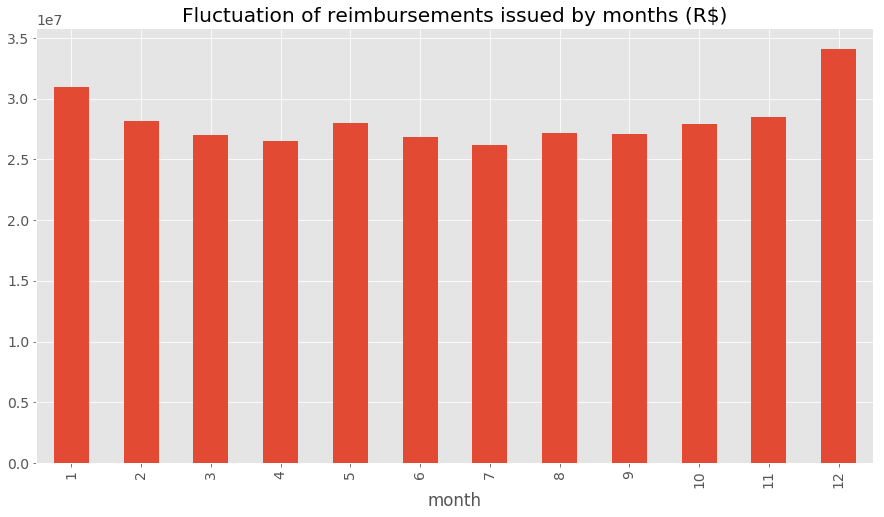

In [10]:
r.groupby('month')\
    .sum()\
    .total_net_value\
    .sort_index()\
    .plot(kind='bar')
    
plt.title('Fluctuation of reimbursements issued by months (R$)')

### Reimbursements by type of spending
For what are congressmen most using their quota?

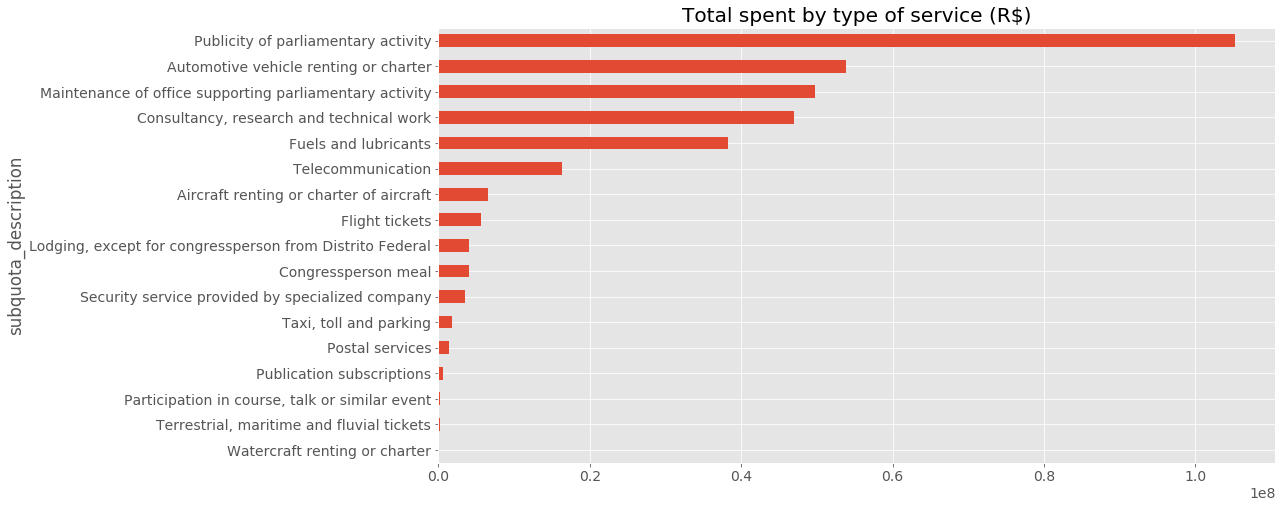

In [11]:
r.groupby('subquota_description')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=True)\
    .plot(kind='barh')
    
plt.title('Total spent by type of service (R$)')

### Which party has the most spending congressmen?

##### How many congressmen in each party?

In [12]:
parties = r.party.unique()
parties

[PP, SD, PMDB, PSDB, PDT, ..., REDE, PRP, PEN, NaN, PRTB]
Length: 29
Categories (28, object): [PP, SD, PMDB, PSDB, ..., REDE, PRP, PEN, PRTB]

In [13]:
# Computes unique names in each state and saves into a pd.Series
d = dict()
for p in parties:
    d[p] = len(r[r.party == p].congressperson_name.unique())

s = pd.Series(d)
s

PP        63
SD        22
PMDB     113
PSDB      75
PDT       31
PT       108
PSB       51
PSOL       6
PSD       60
PR        53
PTB       22
DEM       46
PPS       12
PROS      15
PCdoB     21
PRB       30
PSC       13
PHS        7
PV        13
PTN       14
PSL        3
PMN        3
PTdoB      5
PMB        1
REDE       3
PRP        3
PEN        3
NaN        0
PRTB       1
dtype: int64

#### How much did congressmen from each party spend in the year, in average? 

In [14]:
t = r.groupby('party').sum()
t = t.drop(['year', 'month'], 1)  # Removes useless columns

t['congressmen_per_party'] = s
years = len(r.year.unique())

In [15]:
t['monthly_value_per_congressperson'] = t['total_net_value'] / t['congressmen_per_party'] / (12*years)
t.sort_values(by='monthly_value_per_congressperson', ascending=False).head()

,total_net_value,congressmen_per_party,monthly_value_per_congressperson
party,,,
PTN,9601610.11,14.0,19050.813710
PHS,4741508.89,7.0,18815.511468
PEN,1978335.10,3.0,18317.917593
PMB,639866.76,1.0,17774.076667
PTB,12890798.45,22.0,16276.260669


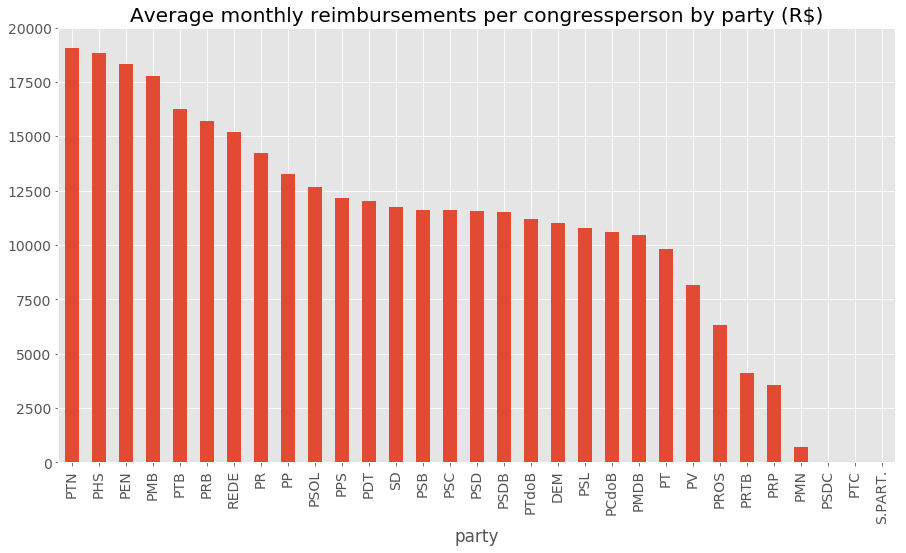

In [16]:
t.monthly_value_per_congressperson\
    .sort_values(ascending=False)\
    .plot(kind='bar')

plt.title('Average monthly reimbursements per congressperson by party (R$)')

### Which state has the most spending congressmen?

##### How many congressmen in each state?

In [17]:
states = r.state.unique()
states

[PR, MA, SC, SP, RJ, ..., SE, TO, RN, MT, NaN]
Length: 28
Categories (27, object): [PR, MA, SC, SP, ..., SE, TO, RN, MT]

In [18]:
# Computes unique names in each party and saves into a pd.Series
d = dict()
for s in states:
    d[s] = len(r[r.state == s].congressperson_name.unique())

s = pd.Series(d)
s

PR      44
MA      34
SC      22
SP     112
RJ      75
MG      73
PA      25
RS      45
PE      40
PI      18
BA      58
CE      33
GO      25
RO      13
MS      13
ES      14
AP      14
AM      13
AC      15
PB      17
AL      16
DF      12
RR      14
SE      13
TO      12
RN      14
MT      13
NaN      0
dtype: int64

#### How much did congressmen from each party spend in the year, in average? 

##### (!) Important: CEAP maximum value differs among states
This section considers these differences, according to: http://www2.camara.leg.br/comunicacao/assessoria-de-imprensa/cota-parlamentar

In [19]:
# Imports CEAP maximum values 
#ceap_states = pd.read_csv('../data/ceap_states.csv')
ceap_states = pd.read_csv('ceap_states.csv')  # Temporary file path (later, move to data/)
ceap_states = ceap_states.set_index('state')

In [20]:
t = r.groupby('state').sum()
t = t.drop(['year', 'month'], 1)  # Removes useless columns

t['congressmen_per_state'] = s
t['monthly_max_ceap'] = ceap_states
years = len(r.year.unique())

In [21]:
t['monthly_value_per_congressperson'] = t['total_net_value'] / t['congressmen_per_state'] / (12*years)
t['ceap_usage'] = (t['monthly_value_per_congressperson'] / t['monthly_max_ceap']) * 100

t.sort_values(by='ceap_usage', ascending=False).head()

,total_net_value,congressmen_per_state,monthly_max_ceap,monthly_value_per_congressperson,ceap_usage
state,,,,,
DF,5.181274e+06,12,30788.66,11993.690208,38.954895
TO,6.527404e+06,12,39503.61,15109.732523,38.248992
GO,1.175417e+07,25,35507.06,13060.189533,36.781951
MG,3.312191e+07,73,36092.71,12603.464779,34.919696
ES,6.581420e+06,14,37423.91,13058.373611,34.893130


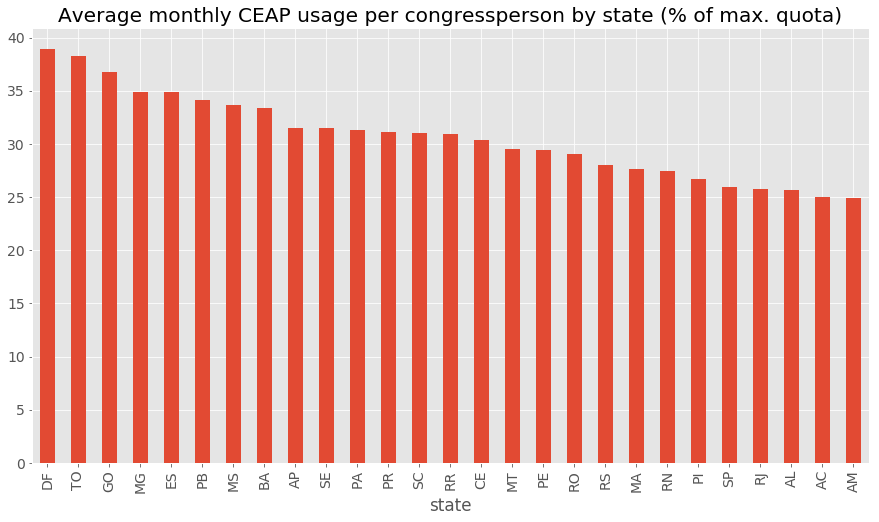

In [22]:
t.ceap_usage\
    .sort_values(ascending=False)\
    .plot(kind='bar')

plt.title('Average monthly CEAP usage per congressperson by state (% of max. quota)')

### Who were the top spenders of all time in absolute terms?

In [23]:
r.groupby('congressperson_name')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=False)\
    .head(10)

congressperson_name
CÉSAR HALUM             1002516.99
MARCOS ROGÉRIO           998630.60
SHÉRIDAN                 989625.19
JHONATAN DE JESUS        962840.26
ELIZEU DIONIZIO          954020.95
JUSCELINO FILHO          945133.90
DOMINGOS NETO            940379.56
CLEBER VERDE             934257.31
FRANCISCO CHAPADINHA     933830.96
ANDRÉ ABDON              930107.99
Name: total_net_value, dtype: float64

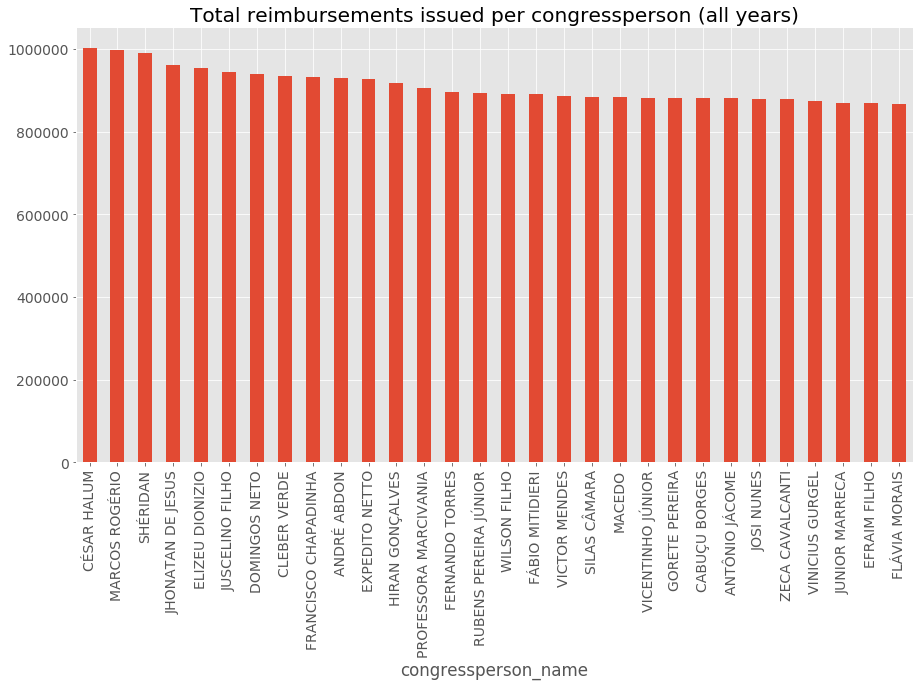

In [24]:
r.groupby('congressperson_name')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=False)\
    .head(30)\
    .plot(kind='bar')

plt.title('Total reimbursements issued per congressperson (all years)')

### Who were the most hired suppliers by amount paid?
This analysis identifies suppliers by their unique CNPJ. It is worth noting that, commonly, some telecom carriers use different CNPJ for its subsidiaries in different states (e.g. TIM SP, TIM Sul, etc).

In [25]:
sp = r.groupby(['cnpj_cpf', 'supplier', 'subquota_description'])\
        .sum()\
        .drop(['year', 'month'], 1)\
        .sort_values(by='total_net_value', ascending=False)

sp.reset_index(inplace=True)  
sp = sp.set_index('cnpj_cpf')

sp.head()

,supplier,subquota_description,total_net_value
cnpj_cpf,,,
22005529000130,DOUGLAS CUNHA DA SILVA ME,"Consultancy, research and technical work",2886396.29
13230334000101,InCine Video Ltda - ME,Publicity of parliamentary activity,1861070.00
15193908000136,JOSELY FERNANDA DO NASCIMENTO,Publicity of parliamentary activity,1349299.96
02558157000162,TELEFÔNICA BRASIL S.A.,Telecommunication,1115745.74
05443449000148,Vértice Associados,"Consultancy, research and technical work",1041946.83


In [26]:
cnpj = r.groupby('cnpj_cpf')\
        .sum()\
        .drop(['year', 'month'], 1)\
        .sort_values(by='total_net_value', ascending=False)

cnpj.head()

,total_net_value
cnpj_cpf,
02558157000162,8153936.87
22005529000130,2975396.29
13230334000101,1948540.00
02012862000160,1853106.87
15193908000136,1349299.96


In [27]:
# Adds supplier name besides total_net_value in cnpj df

cnpj['supplier'] = ''  # Creates empty column
cnpj = cnpj.head(1000)  # Gets only first 1000 for this analysis

In [28]:
# Looks up for supplier names in sp df and fills cnpj df (it takes a while to compute...)

for i in range(len(cnpj)):
    try:
        cnpj.set_value(cnpj.index[i], 'supplier', sp.loc[cnpj.index[i]].supplier.iloc[0])
    except:
        cnpj.set_value(cnpj.index[i], 'supplier', sp.loc[cnpj.index[i]].supplier)

cnpj.head(10)

,total_net_value,supplier
cnpj_cpf,,
02558157000162,8153936.87,TELEFÔNICA BRASIL S.A.
22005529000130,2975396.29,DOUGLAS CUNHA DA SILVA ME
13230334000101,1948540.00,InCine Video Ltda - ME
02012862000160,1853106.87,TAM LINHAS AÉREAS.
15193908000136,1349299.96,JOSELY FERNANDA DO NASCIMENTO
05443449000148,1065946.83,Vértice Associados
11630318000172,984799.99,BRASÍLIA COMUNICAÇÃO E PUBLICIDADE
21793072000103,960867.07,CARVALHO & CARDOSO ADVOGADOS ASSOCIADOS
02610235000120,929500.06,DMD GESTÃO ADM. LTDA


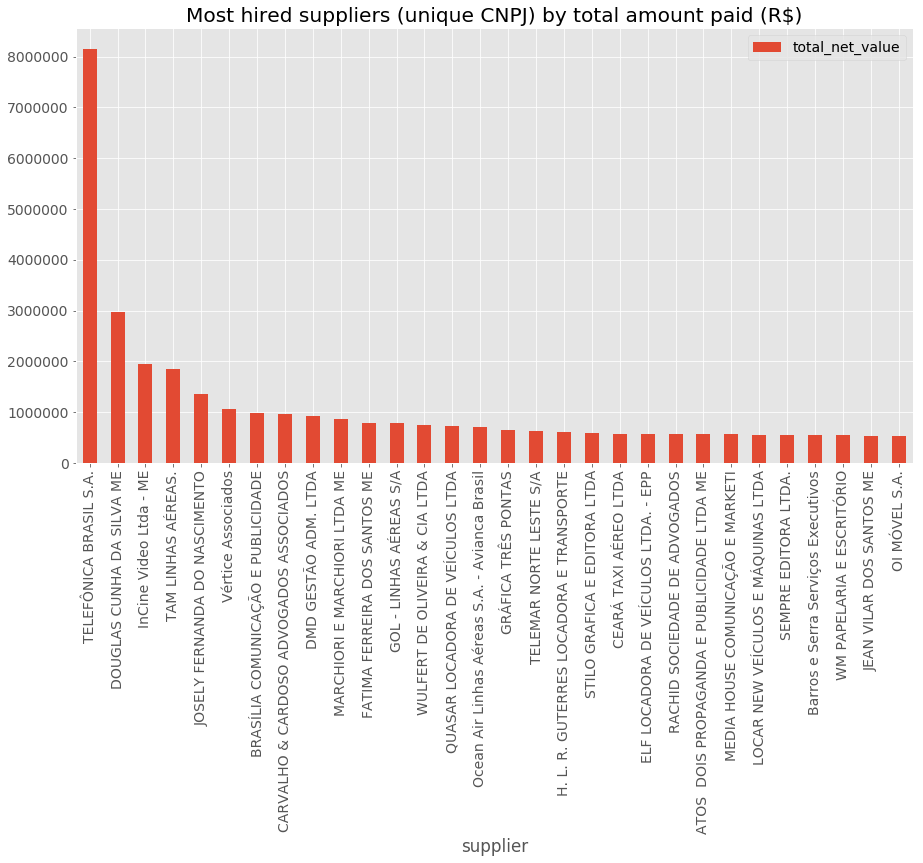

In [29]:
# Fixes better indexing to plot in a copy
sp2 = cnpj.set_index('supplier')

sp2.head(30)\
    .plot(kind='bar')

plt.title('Most hired suppliers (unique CNPJ) by total amount paid (R$)')

#### Which congressmen hired the top supplier and how much did they pay?

In [30]:
r.groupby(['cnpj_cpf', 'congressperson_name'])\
    .sum()\
    .sort_values(by='total_net_value', ascending=False)\
    .loc['02558157000162']\
    .total_net_value\
    .head(20)

congressperson_name
ZECA DIRCEU                    145491.35
CARLOS SAMPAIO                 126460.90
LUIZA ERUNDINA                  95456.00
ANTONIO CARLOS MENDES THAME     94199.69
SÉRGIO MORAES                   90149.92
VALTENIR PEREIRA                89169.02
HENRIQUE FONTANA                82079.08
BONIFÁCIO DE ANDRADA            81757.40
GIUSEPPE VECCI                  77442.94
ÁTILA LINS                      76960.71
CELSO RUSSOMANNO                74886.87
MARCON                          74229.66
MARCO MAIA                      73563.81
RICARDO TRIPOLI                 71660.44
WEVERTON ROCHA                  71228.78
NELSON MARQUEZELLI              69426.02
NILSON PINTO                    67040.64
VANDERLEI MACRIS                64852.32
JOSÉ MENTOR                     64846.86
ALEX MANENTE                    62971.69
Name: total_net_value, dtype: float64

### Which are the most expensive individual reimbursements?

In [31]:
r = r.sort_values(by='total_net_value', ascending=False)
r.head(20)

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
1283850,2015,12,189600.00,PTB,SP,2015.0,2015-12-18 00:00:00.0,ARNALDO FARIA DE SÁ,Publicity of parliamentary activity,GRÁFICA TRÊS PONTAS,54450705000130
1484853,2016,12,184500.00,PTB,SP,2015.0,2016-12-21T00:00:00,ARNALDO FARIA DE SÁ,Publicity of parliamentary activity,GRÁFICA TRÊS PONTAS,54450705000130
1359623,2015,12,137900.00,PT,SP,2015.0,2016-01-06 00:00:00.0,ARLINDO CHINAGLIA,Publicity of parliamentary activity,KARISMA IMPRESSOS E PAPELARIA LTDA - EPP,11416677000121
1402828,2016,11,105000.00,PRB,MA,2015.0,2016-11-10T00:00:00,CLEBER VERDE,Publicity of parliamentary activity,EDITORA DIRECIONAL LTDA-ME,19747956000180
1179410,2015,12,100000.00,SD,ES,2015.0,2015-12-18 00:00:00.0,CARLOS MANATO,Publicity of parliamentary activity,V C F DA SILVA GRAFICA EPP,17798666000130
1241395,2015,11,100000.00,PDT,BA,2015.0,2015-11-27 00:00:00.0,FÉLIX MENDONÇA JÚNIOR,Publicity of parliamentary activity,CONTRASTE EDITORA E INDUSTRIA GRAFICA,33867664000101
1155973,2015,12,99900.00,PMDB,PA,2015.0,2015-12-01 00:00:00.0,ELCIONE BARBALHO,Publicity of parliamentary activity,STILO GRAFICA E EDITORA LTDA,00539486000130
1282745,2015,9,97999.95,PTN,PA,2015.0,2015-09-18 00:00:00.0,FRANCISCO CHAPADINHA,Publicity of parliamentary activity,Global Gráfica da Amazônia LTDA,03339851000151
1483662,2016,4,97200.05,PTN,PA,2015.0,2016-04-04T00:00:00,FRANCISCO CHAPADINHA,Publicity of parliamentary activity,Global Gráfica da Amazônia LTDA,03339851000151
1446097,2016,11,95000.00,PDT,BA,2015.0,2016-11-21T00:00:00,FÉLIX MENDONÇA JÚNIOR,Publicity of parliamentary activity,CONTRASTE EDITORA E INDUSTRIA GRAFICA,33867664000101
